In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

train.head()

Train Shape: (41348, 7)
Test Shape: (7297, 7)


,neighbourhood_group,room_type,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class
0,Manhattan,NaN,2.0,82.5,15.0,254.0,3
1,Manhattan,Private room,2.0,53.7,1.0,0.0,1
2,Brooklyn,Private room,2.0,47.8,70.0,90.0,1
3,Manhattan,Entire home/apt,2.0,58.8,1.0,NaN,1
4,Bronx,Private room,2.0,32.2,0.0,89.0,1


In [2]:
train.info()
train.describe()


<class 'pandas.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  40509 non-null  str    
 1   room_type            40737 non-null  str    
 2   minimum_nights       40026 non-null  float64
 3   amenity_score        40432 non-null  float64
 4   number_of_reviews    40225 non-null  float64
 5   availability_365     40753 non-null  float64
 6   price_class          41348 non-null  int64  
dtypes: float64(4), int64(1), str(2)
memory usage: 2.2 MB


,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class
count,40026.000000,40432.000000,40225.000000,40753.000000,41348.000000
mean,7.002873,51.987233,23.648154,111.912178,1.231619
std,19.725353,19.459480,44.518303,131.273916,0.758579
min,1.000000,10.000000,0.000000,0.000000,0.000000
25%,1.000000,36.800000,1.000000,0.000000,1.000000
50%,3.000000,51.400000,5.000000,44.000000,1.000000
75%,5.000000,66.100000,24.000000,224.000000,2.000000
max,1000.000000,99.000000,607.000000,365.000000,3.000000


In [3]:
train.isnull().sum()

neighbourhood_group     839
room_type               611
minimum_nights         1322
amenity_score           916
number_of_reviews      1123
availability_365        595
price_class               0
dtype: int64

**Fill the missing values using the mode becasuse categorical data**

In [4]:
train.fillna(train.mode().iloc[0], inplace=True)


,neighbourhood_group,room_type,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class
0,Manhattan,Entire home/apt,2.0,82.5,15.0,254.0,3
1,Manhattan,Private room,2.0,53.7,1.0,0.0,1
2,Brooklyn,Private room,2.0,47.8,70.0,90.0,1
3,Manhattan,Entire home/apt,2.0,58.8,1.0,0.0,1
4,Bronx,Private room,2.0,32.2,0.0,89.0,1
...,...,...,...,...,...,...,...
41343,Manhattan,Entire home/apt,2.0,71.5,33.0,227.0,2
41344,Brooklyn,Entire home/apt,30.0,34.4,2.0,314.0,1
41345,Brooklyn,Entire home/apt,3.0,46.4,243.0,217.0,1
41346,Brooklyn,Private room,1.0,52.2,1.0,0.0,1


**Class Distribution**


📌 In Report You Must Answer:

Is dataset balanced?

Is one class dominant?

Could imbalance affect training?

Example:

The dataset shows moderate imbalance where class 1 constitutes 45% of samples, while class 3 represents only 10%.

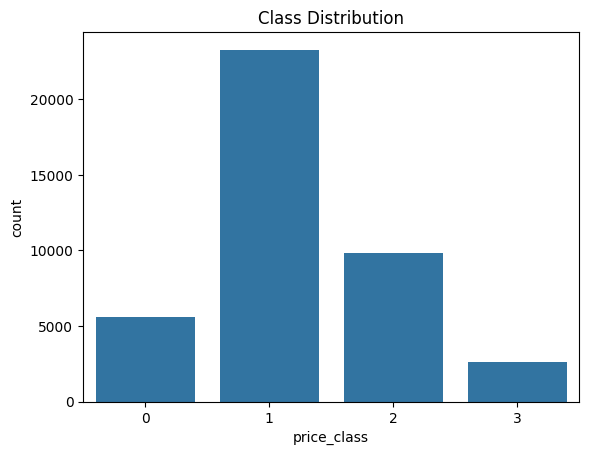

price_class
1    0.563195
2    0.238077
0    0.134638
3    0.064090
Name: proportion, dtype: float64

In [5]:
sns.countplot(x="price_class", data=train)
plt.title("Class Distribution")
plt.show()

train["price_class"].value_counts(normalize=True)
#Bar Chart showing the distribution of price_class
#Bar chart showing:  Budget   Moderate   Premium   Luxury

Important Question:

Should we use Label Encoding or One-Hot Encoding?

Correct Answer:

✅ One-Hot Encoding

Because:

No ordinal relationship

Boroughs are categories

Room types are categories
✅ One-Hot Encoding

Because:

No ordinal relationship

Boroughs are categories

Room types are categories instead of label

because In Report You Must Write:

One-hot encoding was used because the categorical variables do not possess ordinal relationships. Label encoding would impose artificial order.

In [6]:

train = pd.get_dummies(train, columns=["neighbourhood_group", "room_type"], drop_first=True)


🔵 STEP 8 — NORMALIZE NUMERICAL FEATURES

Why normalize?

Because:

Neural networks are sensitive to feature scale

Large values dominate gradients
Standardization was applied to ensure zero mean and unit variance, improving gradient stability and optimization convergence.

In [7]:
scaler = StandardScaler()

numerical_cols = [
    "minimum_nights",
    "number_of_reviews",
    "availability_365",
    "amenity_score"
]

train[numerical_cols] = scaler.fit_transform(train[numerical_cols])


FEATURE vs TARGET RELATIONSHIPS
📌 In Report:

You must interpret:

Does higher amenity_score → higher price class?

Does availability correlate with luxury?

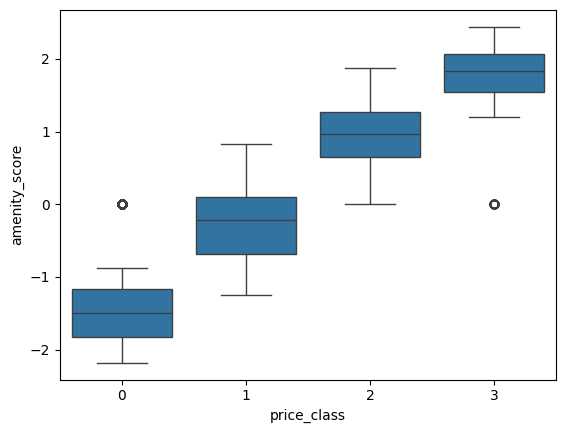

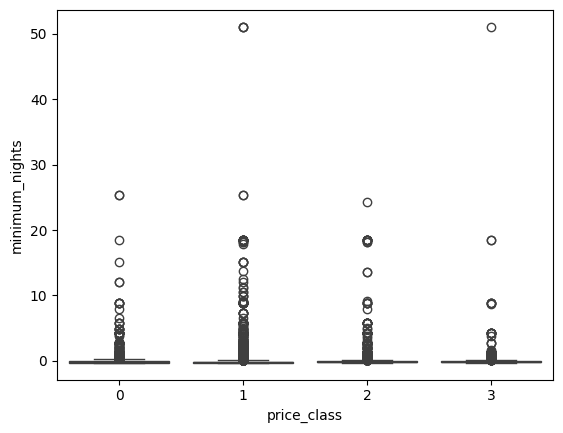

In [8]:
sns.boxplot(x="price_class", y="amenity_score", data=train)
plt.show()

sns.boxplot(x="price_class", y="minimum_nights", data=train)
plt.show()


Correlation matrix:

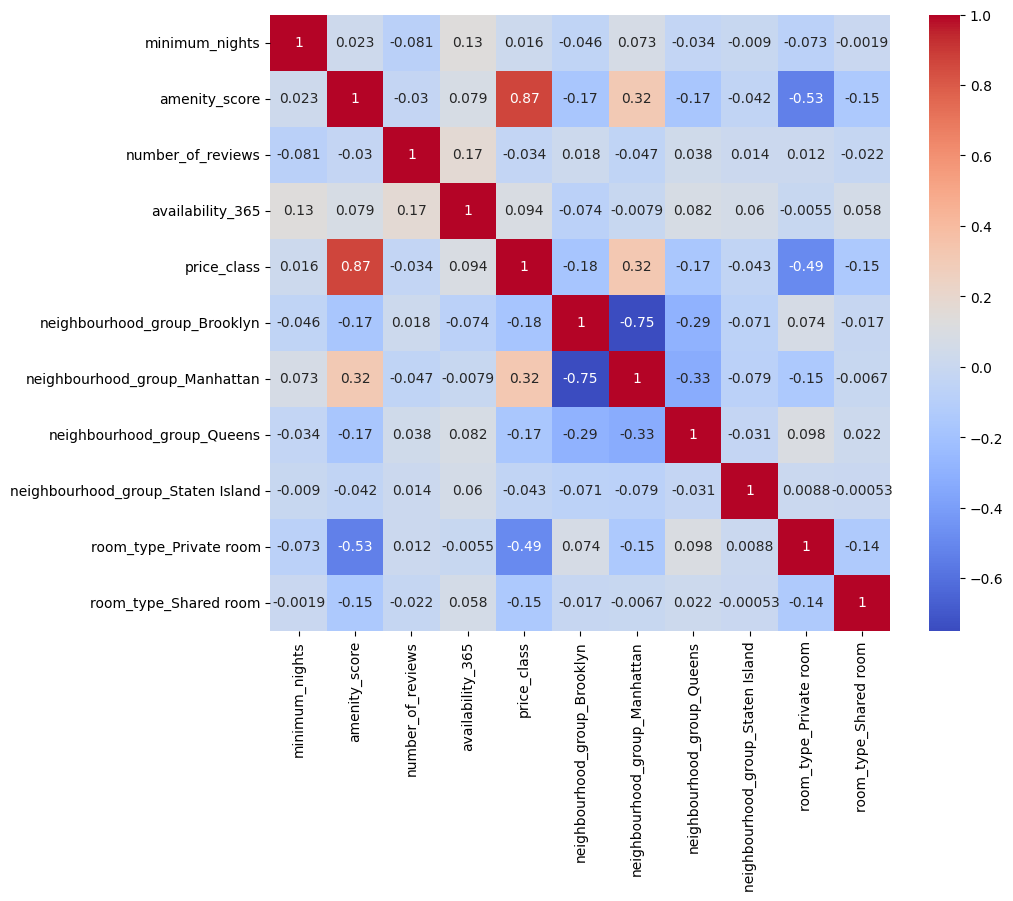

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm")
plt.show()


**Part B**
**B(a)**: Two-Layer Perceptron Implemented from Scratch Implement a feedforward neural network with two hidden layers using only NumPy (or basic tensor
operations). You are not allowed to use any automatic differentiation libraries.
Your model must satisfy the following constraints:
• Explicitly implement:
– Forward propagation
– Cross-entropy loss computation
– Backward propagation using the algorithms and notations discussed in class
• First use (a) Sigmoid activation function, and then (b) ReLU activation function for
all hidden layers; and briefly explain how gradient properties influence optimization and
gradient flow.
• Train the network using vanilla batch gradient descent for at least 200 iterations
for both types of activation functions.
• Report the final training and validation accuracy values for both activation functions
and present a single plot showing the variation of training and validation accuracy as a
function of the iterations.

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Load dataset
train_df = pd.read_csv("data/train.csv")

# Drop missing values
train_df = train_df.dropna()

# One-hot encode ALL categorical columns automatically
train_df = pd.get_dummies(train_df)

# Ensure everything is numeric
train_df = train_df.apply(pd.to_numeric)

# Separate target
y = train_df["price_class"].values
X = train_df.drop("price_class", axis=1).values.astype(float)

print("All columns numeric:", train_df.dtypes.unique())

# Safe normalization
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

# Prevent division by zero
std[std == 0] = 1

X = (X - mean) / std

# One-hot target
num_classes = 4
y_onehot = np.eye(num_classes)[y]

# Split
X_train, X_val, y_train, y_val = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42
)

print("NaN in X_train:", np.isnan(X_train).any())


All columns numeric: [dtype('float64') dtype('int64') dtype('bool')]
NaN in X_train: False


In [11]:
def initialize_parameters():
    input_size = X_train.shape[1]
    hidden1_size = 64
    hidden2_size = 32
    output_size = 4
    
    # He initialization (stable for ReLU)
    W1 = np.random.randn(input_size, hidden1_size) * np.sqrt(2/input_size)
    b1 = np.zeros((1, hidden1_size))
    
    W2 = np.random.randn(hidden1_size, hidden2_size) * np.sqrt(2/hidden1_size)
    b2 = np.zeros((1, hidden2_size))
    
    W3 = np.random.randn(hidden2_size, output_size) * np.sqrt(2/hidden2_size)
    b3 = np.zeros((1, output_size))
    
    return W1, b1, W2, b2, W3, b3


In [12]:
def sigmoid(Z):
    Z = np.clip(Z, -500, 500)
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(A):
    return A * (1 - A)

def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def softmax(Z):
    Z = Z - np.max(Z, axis=1, keepdims=True)
    expZ = np.exp(Z)
    return expZ / np.sum(expZ, axis=1, keepdims=True)


In [13]:
def train_network(activation="relu", lr=0.001, iterations=200):
    
    W1, b1, W2, b2, W3, b3 = initialize_parameters()
    
    grad1_list = []
    grad2_list = []
    train_acc_list = []
    
    m = X_train.shape[0]
    
    for i in range(iterations):
        
        # Forward
        Z1 = X_train @ W1 + b1
        A1 = sigmoid(Z1) if activation=="sigmoid" else relu(Z1)
        
        Z2 = A1 @ W2 + b2
        A2 = sigmoid(Z2) if activation=="sigmoid" else relu(Z2)
        
        Z3 = A2 @ W3 + b3
        A3 = softmax(Z3)
        
        # Backward
        dZ3 = A3 - y_train
        dW3 = A2.T @ dZ3 / m
        
        dA2 = dZ3 @ W3.T
        dZ2 = dA2 * (sigmoid_derivative(A2) if activation=="sigmoid" else relu_derivative(Z2))
        dW2 = A1.T @ dZ2 / m
        
        dA1 = dZ2 @ W2.T
        dZ1 = dA1 * (sigmoid_derivative(A1) if activation=="sigmoid" else relu_derivative(Z1))
        dW1 = X_train.T @ dZ1 / m
        
        # Gradient clipping
        dW1 = np.clip(dW1, -1, 1)
        dW2 = np.clip(dW2, -1, 1)
        dW3 = np.clip(dW3, -1, 1)
        
        # Store gradient magnitudes
        grad1_list.append(np.mean(np.abs(dW1)))
        grad2_list.append(np.mean(np.abs(dW2)))
        
        # Update
        W3 -= lr * dW3
        W2 -= lr * dW2
        W1 -= lr * dW1
        
        # Accuracy
        preds = np.argmax(A3, axis=1)
        true = np.argmax(y_train, axis=1)
        train_acc_list.append(np.mean(preds == true))
    
    return train_acc_list, grad1_list, grad2_list, W1, W2


In [14]:
train_sig, grad1_sig, grad2_sig, W1_sig, W2_sig = train_network(
    activation="sigmoid",
    lr=0.001,
    iterations=200
)




In [15]:

train_relu, grad1_relu, grad2_relu, W1_relu, W2_relu = train_network(
    activation="relu",
    lr=0.001,
    iterations=200)

In [16]:
print("Sigmoid Layer1 avg grad:", np.mean(grad1_sig))
print("Sigmoid Layer2 avg grad:", np.mean(grad2_sig))

print("ReLU Layer1 avg grad:", np.mean(grad1_relu))
print("ReLU Layer2 avg grad:", np.mean(grad2_relu))


Sigmoid Layer1 avg grad: 0.0008506744525348831
Sigmoid Layer2 avg grad: 0.0047570851380370205
ReLU Layer1 avg grad: 0.009838493437903668
ReLU Layer2 avg grad: 0.01780102038421143


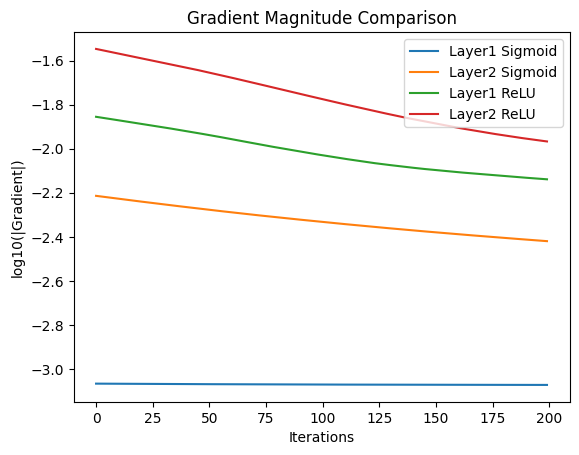

In [17]:
plt.figure()

plt.plot(np.log10(grad1_sig), label="Layer1 Sigmoid")
plt.plot(np.log10(grad2_sig), label="Layer2 Sigmoid")

plt.plot(np.log10(grad1_relu), label="Layer1 ReLU")
plt.plot(np.log10(grad2_relu), label="Layer2 ReLU")

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("log10(|Gradient|)")
plt.title("Gradient Magnitude Comparison")
plt.show()


In [19]:
print("W1 shape:", W1_sig.shape)
print("W2 shape:", W2_sig.shape)

print("First values of W1:\n", W1_sig[:2])
print("First values of W2:\n", W2_sig[:2])


W1 shape: (12, 64)
W2 shape: (64, 32)
First values of W1:
 [[ 0.20276921 -0.05647055  0.26442443  0.62177262 -0.09562409 -0.09559216
   0.64470934  0.31328102 -0.19164901  0.22147601 -0.18915178 -0.1901287
   0.09876013 -0.78105252 -0.70422647 -0.22957802 -0.41351015  0.128293
  -0.37072185 -0.57649297  0.59818332 -0.09224381  0.02752859 -0.58175855
  -0.2222322   0.04535272 -0.4698494   0.15338605 -0.24518654 -0.1190709
  -0.24564837  0.75623437 -0.00548735 -0.43182269  0.33585124 -0.49841188
   0.08523592 -0.80005209 -0.54220042  0.08045407  0.30142414  0.06999357
  -0.04721208 -0.12290007 -0.60361917 -0.29382649 -0.18805792  0.43159865
   0.14028189 -0.71971992  0.1323541  -0.15724629 -0.27643089  0.24971049
   0.42093005  0.38026669 -0.34256734 -0.12625192  0.13526937  0.39822274
  -0.19561881 -0.07579088 -0.45166354 -0.48832236]
 [ 0.33245754  0.55394274 -0.03002225  0.4097567   0.14737516 -0.26352645
   0.1463213   0.62777015 -0.01371762  0.63795708 -1.06940674  0.33512854
   0.0

C(b)
Part C (b): Implementation and Results In this part, you may either re-train a
comparable two-hidden-layer MLP using PyTorch, or reuse the architecture from Part B and
implement the required modifications. The architecture must remain comparable to the network
used previously.
Go through Section 2.8 of Charu C. Aggarwal’s Textbook.
• Implement your proposed gradient-based feature attribution method explained in Section
2.8 of the textbook.
• Implement your ranked list of the most influential input features.
• Briefly interpret the results and relate them back to your findings from Part A.
• For your report submission, provide a pseudo-code of your version of the implemented
aglrothm.

In [20]:
# Convert numpy arrays to torch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_labels = torch.tensor(np.argmax(y_train, axis=1), dtype=torch.long)

X_val_torch = torch.tensor(X_val, dtype=torch.float32)
y_val_labels = torch.tensor(np.argmax(y_val, axis=1), dtype=torch.long)

input_dim = X_train.shape[1]


In [21]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 4)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP(input_dim)


In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [23]:
epochs = 200

for epoch in range(epochs):
    optimizer.zero_grad()
    
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_labels)
    
    loss.backward()
    optimizer.step()

print("Final Training Loss:", loss.item())


Final Training Loss: 0.3538588583469391


In [24]:
with torch.no_grad():
    val_outputs = model(X_val_torch)
    _, predicted = torch.max(val_outputs, 1)
    accuracy = (predicted == y_val_labels).float().mean()
    
print("Validation Accuracy:", accuracy.item())


Validation Accuracy: 0.8362081050872803


In [25]:
# Enable gradient tracking on input
X_train_torch.requires_grad = True

outputs = model(X_train_torch)
loss = criterion(outputs, y_train_labels)

model.zero_grad()
loss.backward()

# Get gradient wrt input
input_grad = X_train_torch.grad


In [26]:
# Take absolute value and average across samples
feature_importance = torch.mean(torch.abs(input_grad), dim=0)

feature_importance = feature_importance.detach().numpy()


In [27]:
feature_names = train_df.drop("price_class", axis=1).columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
})

importance_df = importance_df.sort_values(by="Importance", ascending=False)

importance_df.head(10)


,Feature,Importance
1,amenity_score,0.000032
11,room_type_Shared room,0.000006
0,minimum_nights,0.000004
8,neighbourhood_group_Staten Island,0.000004
5,neighbourhood_group_Brooklyn,0.000004
7,neighbourhood_group_Queens,0.000004
9,room_type_Entire home/apt,0.000004
10,room_type_Private room,0.000004
3,availability_365,0.000003
6,neighbourhood_group_Manhattan,0.000003
